In [1]:
# !pip install JPype1
# !pip install konlpy
# !pip install wordcloud
# !pip install nltk

In [2]:
with open('data-files/constitution.txt') as f:
    constition = f.read()

In [3]:
constition[:100]   #미국 헌법 내용임..

'We the People of the United States, in Order to form a more perfect Union, establish Justice, insure'

In [4]:
# 각각 몇번 나오는지 count, 각 단어 빈도수 count
from wordcloud import WordCloud   

In [5]:
wc = WordCloud()
wc_model = wc.generate(constition)

In [6]:
# wc_model.words_    # 단어 상대적 빈도수치 
# wc_model.to_array() # 픽셀값
wc_model.to_array().shape #(200, 400, 3)  행200개, 열 400개 출력

(200, 400, 3)

In [7]:
import matplotlib.pyplot as plt

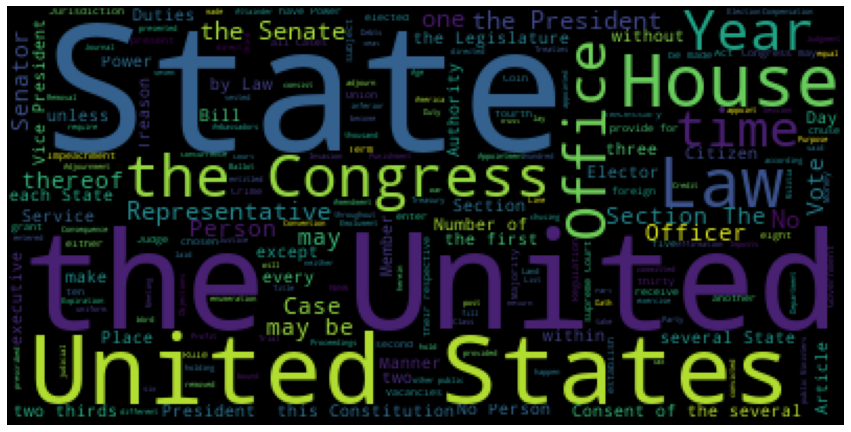

In [8]:
plt.figure(figsize=(15,10))
# plt.imshow(wc_model)
plt.imshow(wc_model, interpolation='antialiased')    # imshow : 픽셀값을 이용해서 이미지 만든다
plt.axis("off")
plt.show()
# interpolation='antialiased' : 이미지 계단현상 있을시 사용하면 부드럽게 도와준다.

In [9]:
from konlpy.corpus import kolaw  

In [10]:
with kolaw.open('constitution.txt') as f:
    ko_constitution = f.read()

In [11]:
ko_constitution[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [12]:
from konlpy.tag import Twitter #(Twitter 사전 이용, 사전이용해야 형태소 분리 가능)

In [13]:
t = Twitter() # 한글 사전을 기반으로 형태소 분석

In [14]:
ko_tokens = t.nouns(ko_constitution)
ko_tokens[:100]     #단어들 뽑아서 진행
one_word_token = []
for token in ko_tokens:
    if len(token) == 1 and token not in one_word_token:
        one_word_token.append(token)
        # print(token)
# one_word_token

In [15]:
stop_words = ['제','월','일','조','수','때','그','이','바','및','안']
ko_tokens2 = [ token for token in ko_tokens if token not in stop_words] 
# stop_words가 포함되어 있지 않은것만 가져오기.
# ko_tokens2

In [16]:
import numpy as np
import pandas as pd

In [17]:
tmp = np.unique(ko_tokens2, return_counts=True)
tmp_df = pd.DataFrame({'word' : tmp[0], 'cnt': tmp[1]})
tmp_df.sort_values(by=['cnt'], ascending=False).head()

,word,cnt
303,법률,127
653,정,89
215,대통령,83
102,국가,73
123,국회,68


In [18]:
import nltk

In [19]:
ko_model = nltk.Text(ko_tokens2)   #단어 빈도수 계산
# ko_model.vocab()
_model = nltk.Text(ko_tokens2)   #단어 빈도수 계산
# ko_model.vocab()
ko_data = ko_model.vocab().most_common(200) # 빈도수 높은것 순으로 뽑아준다
ko_data[:10]

[('법률', 127),
 ('정', 89),
 ('대통령', 83),
 ('국가', 73),
 ('국회', 68),
 ('국민', 61),
 ('관', 58),
 ('헌법', 53),
 ('모든', 37),
 ('위', 36)]

In [20]:
# ko_data_dict = dict(ko_data) # {단어: 빈도수}  
# wc = WordCloud(font_path=r"D:\yun\workspace\Font\NanumGothic.ttf")
# wc_model2 = wc.generate_from_frequencies(ko_data_dict)

In [21]:
# plt.figure(figsize=(15, 10))
# plt.imshow(wc_model2)
# plt.axis('off')
# plt.show()

In [22]:
from PIL import Image

korea_map = Image.open('data-files/korea-map.jpg')
korea_map_array = np.array(korea_map)
korea_map_array.shape

(727, 489, 3)

In [25]:
ko_data_dict = dict(ko_data) # {단어: 빈도수}  
wc = WordCloud(font_path=r"D:\yun\workspace\Font\NanumGothic.ttf", 
                mask=korea_map_array,background_color='white')
wc_model2 = wc.generate_from_frequencies(ko_data_dict)

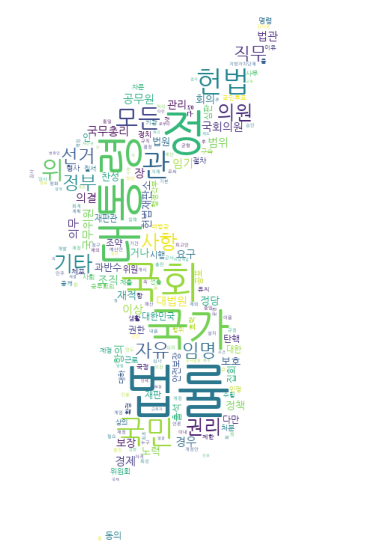

In [26]:
plt.figure(figsize=(15, 10))
plt.imshow(wc_model2)
plt.axis('off')
plt.show()